Задание: нормализовать числовые данные и закодировать категориальные, если  конкретный признак ни на что не влияет, можно его выкинуть.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df = pd.read_csv('/content/chemicals-in-cosmetics-two.csv')
df = df.drop_duplicates()
cols_to_drop = ['DiscontinuedDate', 'ChemicalDateRemoved', 'ChemicalUpdatedAt', 'InitialDateReported', 'BrandName', 'SubCategoryId', 'SubCategory', "CSFId", "CompanyId", "PrimaryCategoryId", "CasId", "ChemicalId", "CasNumber"]
# удаляю столбцы с айдишниками - они дублируют столбцы, которым принадлежат, удаляю даты, так как почти во всех данных они отсутствуют (узнали в прошлом задании)
# удаляю имя бренда, так как есть имя компании и нам этого достаточно, по той же причине удаляю подкатегорию продукта, так как есть основная категория
df = df.drop(cols_to_drop, axis=1)
print('The original database shape:', df.shape, '\n', df.dtypes) 
df.head()

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Numeric cols:',numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Non numeric cols:',non_numeric_cols)



The original database shape: (66, 9) 
 CDPHId                     int64
ProductName               object
CSF                       object
CompanyName               object
PrimaryCategory           object
ChemicalName              object
MostRecentDateReported    object
ChemicalCreatedAt         object
ChemicalCount              int64
dtype: object
Numeric cols: ['CDPHId' 'ChemicalCount']
Non numeric cols: ['ProductName' 'CSF' 'CompanyName' 'PrimaryCategory' 'ChemicalName'
 'MostRecentDateReported' 'ChemicalCreatedAt']


Удаляю столбцы с айдишниками - они дублируют столбцы, которым принадлежат, удаляю даты, так как почти во всех данных они отсутствуют (узнали в прошлом задании), имя бренда, так как есть имя компании и этого достаточно, по той же причине удаляю подкатегорию продукта, так как есть основная категория. 

Заполняю пропуски, как в прошлом задании: 

In [7]:
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        data_non_numeric['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: CSF


Получившаяся база:

In [8]:
df.head()

,CDPHId,ProductName,CSF,CompanyName,PrimaryCategory,ChemicalName,MostRecentDateReported,ChemicalCreatedAt,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,moonshine,New Avon LLC,Makeup Products (non-permanent),Titanium dioxide,08/28/2013,07/09/2009,1
1,3,Glover's Medicated Shampoo,moonshine,J. Strickland & Co.,Hair Care Products (non-coloring),Distillates (coal tar),07/01/2009,07/01/2009,2
2,3,Glover's Medicated Shampoo,moonshine,J. Strickland & Co.,Hair Care Products (non-coloring),Estragole,07/01/2009,07/02/2009,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,moonshine,New Avon LLC,Makeup Products (non-permanent),Titanium dioxide,08/28/2013,07/09/2009,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,moonshine,New Avon LLC,Makeup Products (non-permanent),Titanium dioxide,08/28/2013,07/09/2009,1


In [9]:
df.nunique()

CDPHId                    51
ProductName               15
CSF                        6
CompanyName                7
PrimaryCategory            4
ChemicalName               8
MostRecentDateReported     8
ChemicalCreatedAt         10
ChemicalCount              4
dtype: int64

Там где меньше уникальных значений - можно кодировать унитарным, остальное кодируем метками

Кодирование метки: 

In [10]:
df["ProductName"] = df["ProductName"].astype('category')
df["ProductName_catCodes"] = df["ProductName"].cat.codes
df["ChemicalName"] = df["ChemicalName"].astype('category')
df["ChemicalName_catCodes"] = df["ChemicalName"].cat.codes
df["MostRecentDateReported"] = df["MostRecentDateReported"].astype('category')
df["MostRecentDateReported_catCodes"] = df["MostRecentDateReported"].cat.codes
df["ChemicalCreatedAt"] = df["ChemicalCreatedAt"].astype('category')
df["ChemicalCreatedAt_catCodes"] = df["ChemicalCreatedAt"].cat.codes
cols_to_drop = ['ProductName', 'ChemicalName', 'MostRecentDateReported', 'ChemicalCreatedAt']
df = df.drop(cols_to_drop, axis=1)
df.head()
df.dtypes

CDPHId                              int64
CSF                                object
CompanyName                        object
PrimaryCategory                    object
ChemicalCount                       int64
ProductName_catCodes                 int8
ChemicalName_catCodes                int8
MostRecentDateReported_catCodes      int8
ChemicalCreatedAt_catCodes           int8
dtype: object

Видно, что данные закодировались с типом данных int8. 

Унитарное кодирование:

In [11]:
df=pd.get_dummies(df, columns=["CSF", "CompanyName", "PrimaryCategory"]).head()

In [12]:
df.head()

,CDPHId,ChemicalCount,ProductName_catCodes,ChemicalName_catCodes,MostRecentDateReported_catCodes,ChemicalCreatedAt_catCodes,CSF_Timiron Splendid Gold,CSF_Timiron Splendid Red,CSF_koral kiss,CSF_moonshine,...,"CompanyName_McConnell Labs, Inc.",CompanyName_New Avon LLC,CompanyName_Philosophy,"CompanyName_Physician's Care Alliance, LLC",CompanyName_Revlon Consumer Product Corporation,"CompanyName_Sunrider Manufacturing, L.P.",PrimaryCategory_Hair Care Products (non-coloring),PrimaryCategory_Makeup Products (non-permanent),PrimaryCategory_Nail Products,PrimaryCategory_Skin Care Products
0,2,1,14,6,4,4,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,3,2,7,2,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,3,2,7,3,1,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,1,8,6,4,4,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,5,1,1,6,4,4,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


Получилась таблица без категориальных данных.

Нормализую данные библиотекой sclearn: 

In [13]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features_train = scale_features_std.fit_transform(df) 

In [14]:
print(features_train)

[[-1.37281295 -0.81649658  1.59885522  0.80295507  0.81649658  0.79056942
   0.          0.          0.          0.          0.          0.
  -0.81649658  0.          0.81649658  0.          0.          0.
   0.         -0.81649658  0.81649658  0.          0.        ]
 [-0.39223227  1.22474487 -0.09690032 -1.49120227 -1.22474487 -1.58113883
   0.          0.          0.          0.          0.          0.
   1.22474487  0.         -1.22474487  0.          0.          0.
   0.          1.22474487 -1.22474487  0.          0.        ]
 [-0.39223227  1.22474487 -0.09690032 -0.91766294 -1.22474487 -0.79056942
   0.          0.          0.          0.          0.          0.
   1.22474487  0.         -1.22474487  0.          0.          0.
   0.          1.22474487 -1.22474487  0.          0.        ]
 [ 0.58834841 -0.81649658  0.14535047  0.80295507  0.81649658  0.79056942
   0.          0.          0.          0.          0.          0.
  -0.81649658  0.          0.81649658  0.          0.

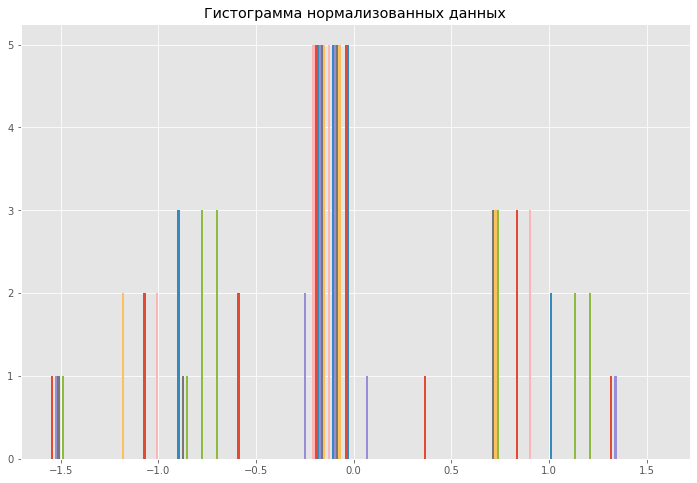

In [15]:
plt.hist(features_train) 
plt.title("Гистограмма нормализованных данных") 
plt.show()

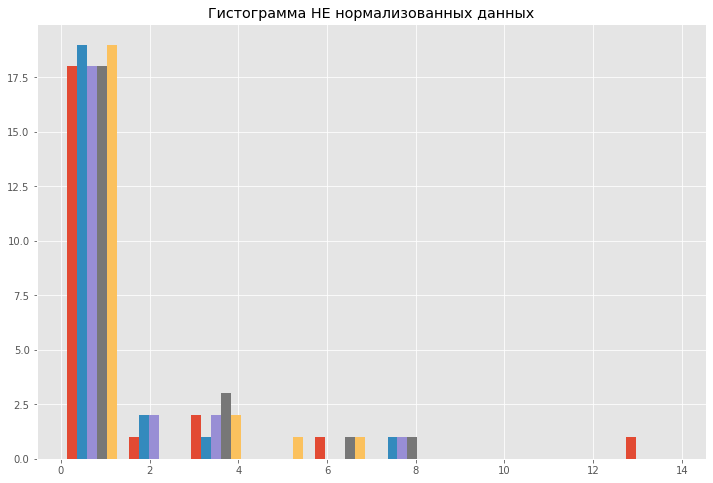

In [17]:
plt.hist(df) 
plt.title("Гистограмма НЕ нормализованных данных") 
plt.show()